In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

#checking library versions
print("Numpy -> " + np.__version__)
print("Pandas -> " + pd.__version__)
print("Tensorflow -> " + tf.__version__)
print("Keras -> " + keras.__version__)

Numpy -> 1.20.1
Pandas -> 1.2.4
Tensorflow -> 2.3.0
Keras -> 2.4.0


In [2]:
cwd = os.getcwd()
cwd

'C:\\Users\\migot\\Desktop\\DriveAI'

In [8]:
def load_images(name, path):
    img = Image.open(path + "/" + name)
    img = np.array(img)
    
    #return img, seg
    return img/255

In [9]:
def create_dataset(train_path, test_path):
    train_img_dataset = []
    #train dataset
    files = os.listdir(train_path)[0:12]
    for file in files:
        X = load_images(file, train_path)
        train_img_dataset.append(X)
    
    return train_img_dataset

In [11]:
train_path = cwd + "/high_res_data"

X_train = create_dataset(train_path, train_path)

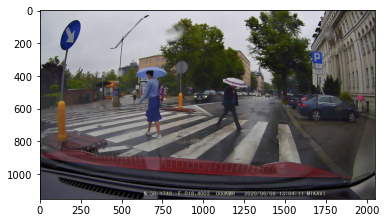

In [12]:
plt.imshow(X_train[1])
plt.show()

(1152, 2048, 3)

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=[1152,2048,3]),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(64, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(1024, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(1024, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(512, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(256, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(128, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same"),
    keras.layers.Conv2D(64, (3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(64, (3, 3), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Conv2D(3, (1, 1), activation="sigmoid")
])

In [15]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1152, 2048, 64)    1792      
_________________________________________________________________
activation (Activation)      (None, 1152, 2048, 64)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1152, 2048, 64)    36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 1152, 2048, 64)    256       
_________________________________________________________________
activation_1 (Activation)    (None, 1152, 2048, 64)    0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 576, 1024, 64)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 576, 1024, 128)    7

In [16]:
X_train = np.stack([i.tolist() for i in X_train[0:12]])

In [17]:
model.load_weights('modelv2.h5')

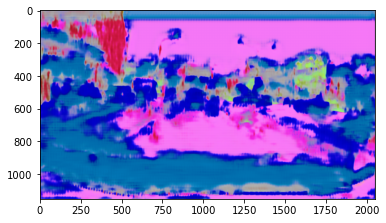

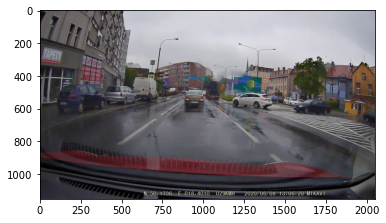

-----------------------------


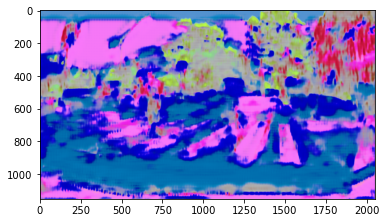

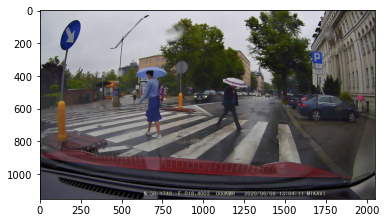

-----------------------------


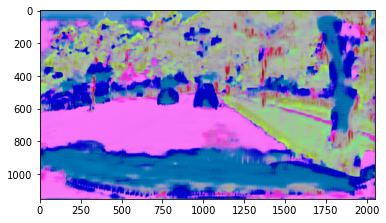

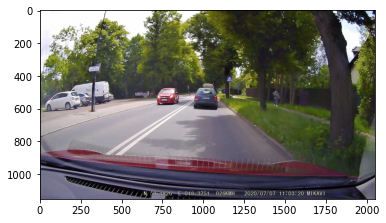

-----------------------------


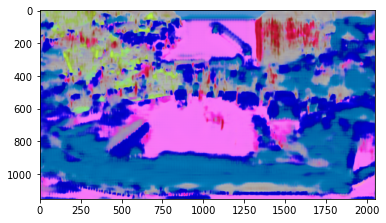

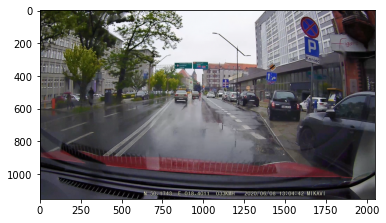

-----------------------------


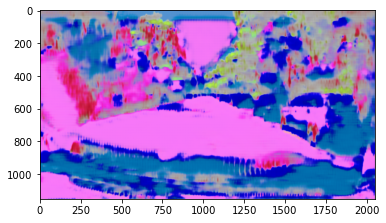

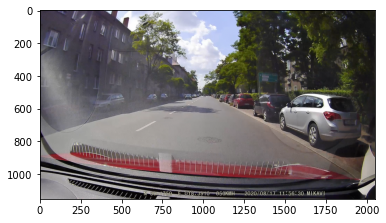

-----------------------------


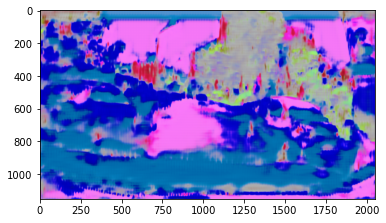

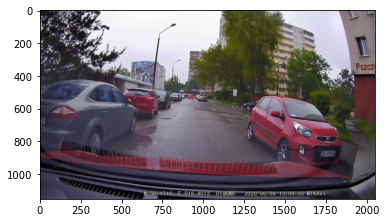

-----------------------------


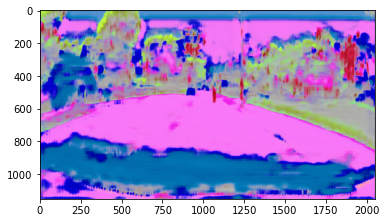

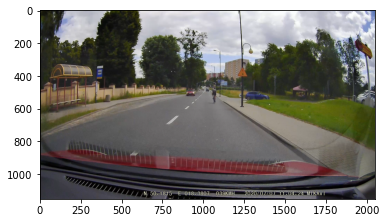

-----------------------------


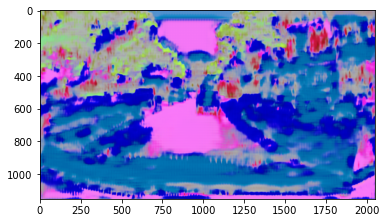

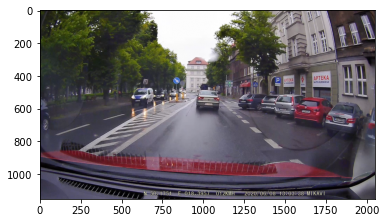

-----------------------------


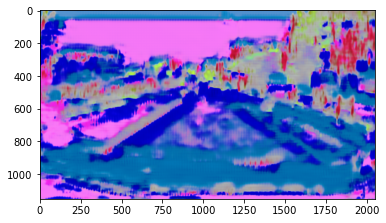

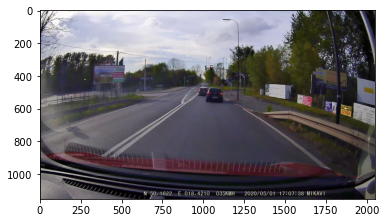

-----------------------------


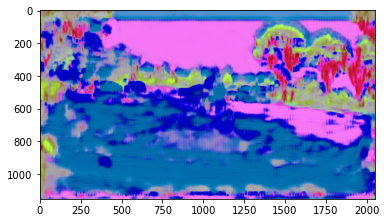

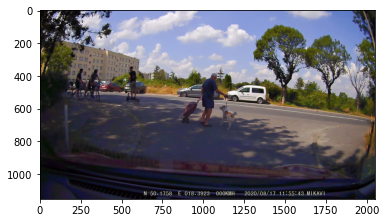

-----------------------------


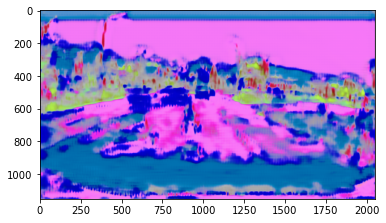

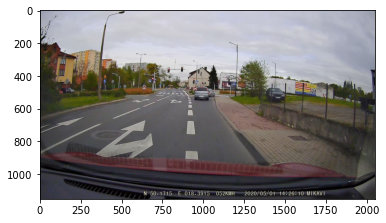

-----------------------------


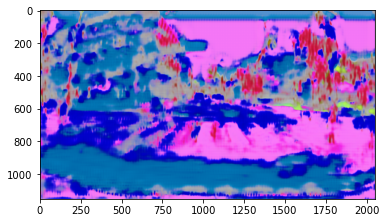

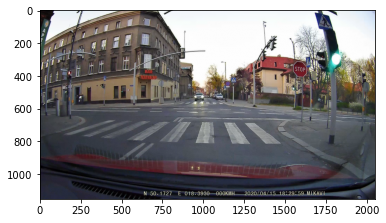

-----------------------------


In [24]:
for x_tr in X_train:
    x = np.stack([x_tr.tolist()])
    pred = model.predict(x)
    predx = np.squeeze(pred)
    plt.imshow(predx)
    plt.show()
    plt.imshow(x_tr)
    plt.show()
    print("-----------------------------")